# Лабораторные работы #2 и #3

Предмет: **Интеллектуальные системы АиСИС**

Студент: **Дарковский Илья**

Группа: **ИВМО-01-20**

## Импорты

In [1]:
import numpy as np
from emnist import extract_training_samples
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

from classifier import NeuralNetwork as nn

## Общие функции и константы

In [2]:
np.set_printoptions(threshold=256)

N_TRAIN_SAMPLES = 50000
N_TEST_SAMPLES = 2500
N_EPOCHS = 5
RANDOM_SEED = 42

INPUT_NODES = 784
LR = 0.05

MIN_VAL = 0.01
MAX_VAL = 0.99

In [3]:
def prepare_data(
    X,
    Y,
    start_indx=0,
    end_indx=0,
):
    """
    Склеивание данных и меток с урезанием до требуемого числа.
    Склеиваем для того, чтобы потом можно было их перемешивать. 
    """
    concat_data = []
    for x, y in zip(
        X[start_indx:end_indx],
        Y[start_indx:end_indx],
    ):
        data = x.reshape(INPUT_NODES)
        data = (np.asfarray(data) / 255 * MAX_VAL) + MIN_VAL
        data = np.append(data, y)
        concat_data.append(data)
    return concat_data


def fit_classifier(
    clf,
    train_data,
    n_outs,
    n_epochs=N_EPOCHS,
):
    """
    Обучение классификатора на тренировочных данных 
    на протяжении заданного кол-ва эпох.
    """
    for epoch in tqdm(range(n_epochs)):
        np.random.shuffle(train_data)
        for data in tqdm(train_data):
            yi = int(data[-1])
            Y = np.zeros(n_outs) + MIN_VAL
            Y[yi] = MAX_VAL
            X = data[:-1]
            clf.fit(X, Y)
        print(f'MSE: {clf.error()[0]}')


def get_tpr(clf, test_data):
    """
    Измерение качества у классификатора.
    """
    tp = 0
    fn = 0
    for data in test_data:
        pred = clf.predict(data[:-1])
        max_indx = np.argmax(pred)
        if (max_indx == data[-1]):
            tp += 1
        else:
            fn += 1
    return tp / (tp + fn)

## Лабораторная работа №2

Написать свою нейросеть прямого распространения и обучить её для распознования образов цифр.

### Предобработка данных

In [4]:
digits, labels = extract_training_samples('digits')

print(digits.shape)
print(labels.shape)

(240000, 28, 28)
(240000,)


In [5]:
train_data = prepare_data(
    X=digits,
    Y=labels,
    end_indx=N_TRAIN_SAMPLES,
)
test_data = prepare_data(
    X=digits,
    Y=labels,
    start_indx=N_TRAIN_SAMPLES,
    end_indx=N_TRAIN_SAMPLES+N_TEST_SAMPLES,
)

In [6]:
len(train_data), len(test_data)

(50000, 2500)

In [7]:
train_data[0]

array([0.01, 0.01, 0.01, ..., 0.01, 0.01, 8.  ])

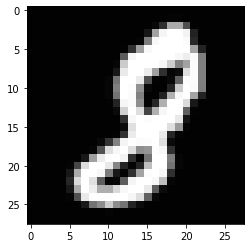

In [8]:
plt.imshow(train_data[0][:-1].reshape((28,28)), cmap='gray', vmin=0, vmax=1)

In [9]:
test_data[0]

array([0.01, 0.01, 0.01, ..., 0.01, 0.01, 2.  ])

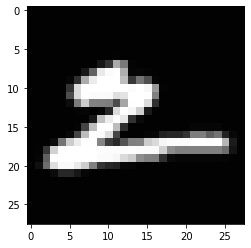

In [10]:
plt.imshow(test_data[0][:-1].reshape((28,28)), cmap='gray', vmin=0, vmax=1)

### Обучение

In [11]:
OUT_NODES = 10

digit_classifier = nn(
    input_nodes=INPUT_NODES,
    hidden_nodes=(100, 100),
    out_nodes=OUT_NODES, 
    lr=LR,
)

In [12]:
fit_classifier(
    clf=digit_classifier,
    train_data=train_data,
    n_outs=OUT_NODES,
    n_epochs=5,
)

tpr = get_tpr(digit_classifier, test_data)


MSE: 0.0015228784558873457



MSE: 0.0009441550428269152



MSE: 0.00036748242492552676



MSE: 0.003935301100635846



MSE: 0.023593788610142073



In [13]:
print(f'TPR = {tpr}')

TPR = 0.9592


In [14]:
digit_classifier.predict(test_data[-1][:-1])

array([[1.34540352e-02],
       [4.07879067e-03],
       [1.50757278e-02],
       [2.50664896e-01],
       [4.45423396e-03],
       [9.69136563e-01],
       [1.45685756e-03],
       [7.11361924e-03],
       [6.43267967e-04],
       [1.76850889e-03]])

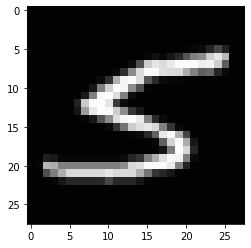

In [15]:
plt.imshow(test_data[-1][:-1].reshape((28,28)), cmap='gray', vmin=0, vmax=1)

## Лабораторная работа №3

Написать свою нейросеть прямого распространения и обучить её для распознования образов букв.

### Предобработка данных

In [16]:
letters, labels = extract_training_samples('letters')

print(letters.shape)
print(labels.shape)

(124800, 28, 28)
(124800,)


In [17]:
train_data = prepare_data(
    X=letters,
    Y=labels,
    end_indx=N_TRAIN_SAMPLES,
)
test_data = prepare_data(
    X=letters,
    Y=labels,
    start_indx=N_TRAIN_SAMPLES,
    end_indx=N_TRAIN_SAMPLES+N_TEST_SAMPLES,
)

In [18]:
len(train_data), len(test_data)

(50000, 2500)

In [19]:
labels.min(), labels.max()

(1, 26)

In [20]:
train_data[0]

array([1.0e-02, 1.0e-02, 1.0e-02, ..., 1.0e-02, 1.0e-02, 2.3e+01])

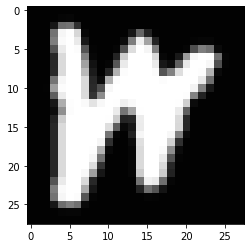

In [21]:
plt.imshow(train_data[0][:-1].reshape((28,28)), cmap='gray', vmin=0, vmax=1)

In [22]:
train_data[0][-1]

23.0

In [23]:
chr(int(train_data[0][-1]) + 64)

'W'

### Обучение

In [38]:
HIDDEN_NODES = (260, 130)
OUT_NODES = 27

letter_classifier = nn(
    input_nodes=INPUT_NODES,
    hidden_nodes=HIDDEN_NODES,
    out_nodes=OUT_NODES,
    lr=LR,
)

In [39]:
fit_classifier(
    clf=letter_classifier,
    train_data=train_data,
    n_outs=OUT_NODES,
    n_epochs=5,
)


MSE: 0.02643496013882897



MSE: 0.008264029617126092



MSE: 0.031292669453105305



MSE: 0.0027616501022910502



MSE: 1.086444284897554



In [40]:
print(f'TPR = {get_tpr(letter_classifier, test_data)}')

TPR = 0.8104


In [41]:
letter_classifier.predict(test_data[0][:-1])

array([[4.38481061e-03],
       [1.66824021e-02],
       [6.40167636e-03],
       [1.81271236e-02],
       [6.72174143e-03],
       [9.72685035e-01],
       [2.43418799e-02],
       [1.21805960e-02],
       [6.33173754e-03],
       [1.91942184e-02],
       [5.88817729e-04],
       [3.34964884e-03],
       [4.40130001e-03],
       [3.49202569e-03],
       [6.34744697e-03],
       [1.52345319e-02],
       [5.63762485e-03],
       [2.97792218e-02],
       [7.22500580e-03],
       [2.51998054e-02],
       [3.59032860e-03],
       [9.49868520e-03],
       [2.28820069e-02],
       [3.21804617e-02],
       [4.13304641e-03],
       [3.19222174e-03],
       [2.75551135e-02]])

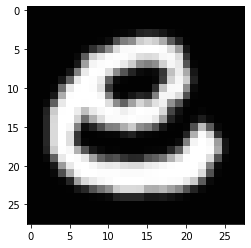

In [42]:
plt.imshow(test_data[0][:-1].reshape((28,28)), cmap='gray', vmin=0, vmax=1)

In [43]:
chr(int(test_data[0][-1]) + 64)

'E'